In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize data

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

### Build Neural Network Architecture

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #number of classifications (0-9)




### Training Data

In [19]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2611 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1077 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9765


### Validation Loss and Accuracy

In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9705
0.08878370374441147 0.9704999923706055


### Loading and Saving Models

In [21]:
model.save('num_reader.model')
new_model = tf.keras.models.load_model('num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_reader.model\assets
7


In [ ]:
predictions = new_model.predict([x_test])
print(np.argmax(predictions[0]))

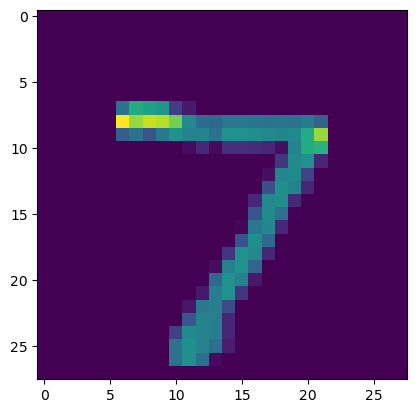

In [22]:
plt.imshow(x_test[0])